In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np

In [2]:
from velgen import Model, Pipeline, DippingLayer, GaussianSalt, LinearWaterLayer, CosineFold

In [3]:
nx=200
ny=100
shape=(nx,ny)

velseed=[1.8, 2.2, 2.5, 3.0, 3.5]

In [4]:
generator = Pipeline([
    DippingLayer(),
    CosineFold(amax=0.02),
    GaussianSalt(width_range=(0.05,0.1)),
    LinearWaterLayer()
    ])

In [5]:
nr=3
nc=5
nvel=nr*nc
figsize=[15,7]
    
def test_generator_model(generator,model):
    plt.figure(figsize=figsize)
    for i in range(nvel):
        v=generator.generate(model)
        plt.subplot(nr,nc,i+1)
        plt.imshow(v.T,vmin=1.5,vmax=5)
    plt.tight_layout()

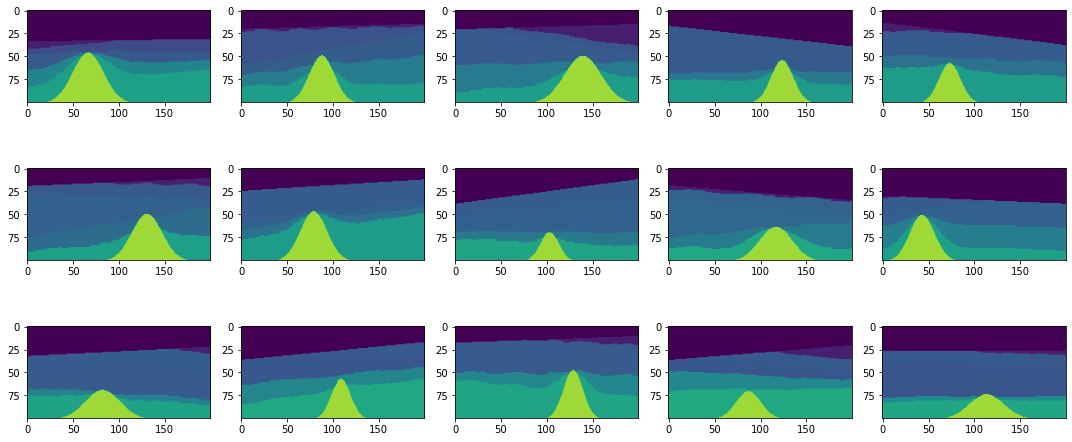

In [6]:
model = Model(shape, velseed)

test_generator_model(generator, model)

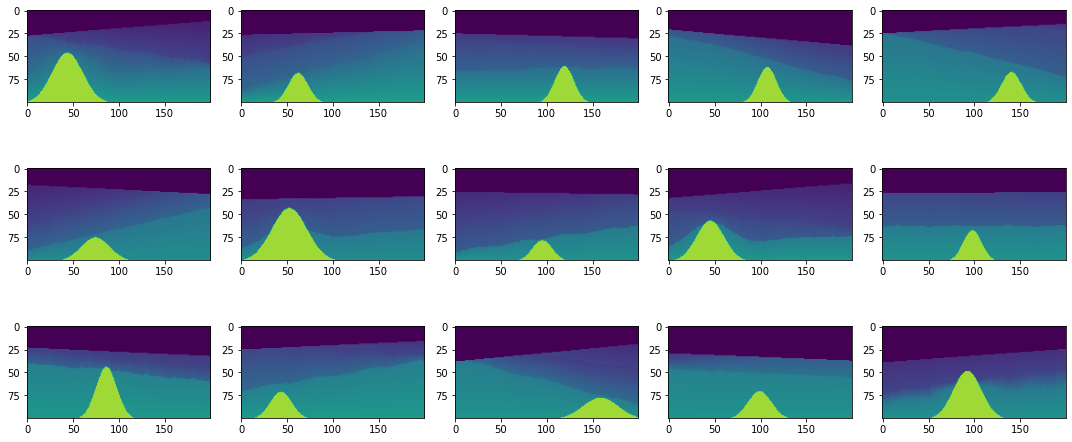

In [7]:
velseed_linear = [(1.7,2.2),(2.3,2.7),(2.8,3.5)]
model2 = Model(shape, velseed_linear)

test_generator_model(generator, model2)

In [8]:
from velgen.util import flat_generator, dip_generator, cosine_fold_generator
from velgen.util import linear_fault_generator, gaussian_salt_generator, elliptic_salt_generator
from velgen.util import gom_generator

In [9]:
def test_generator(generator):
    plt.figure(figsize=figsize)
    for i in range(nvel):
        v = generator.generate()
        plt.subplot(nr,nc,i+1)
        plt.imshow(v.T,vmin=1.5,vmax=5)
    plt.tight_layout()

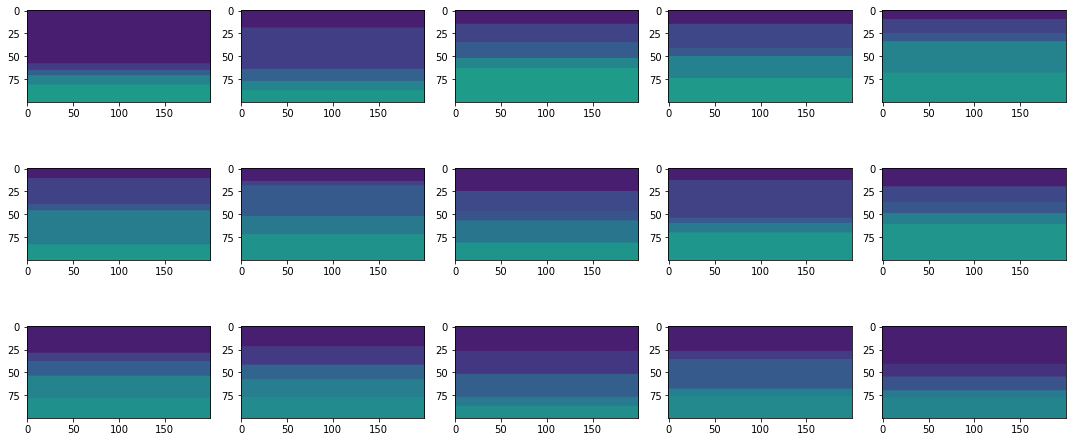

In [10]:
generator = flat_generator(shape,velseed)
test_generator(generator)

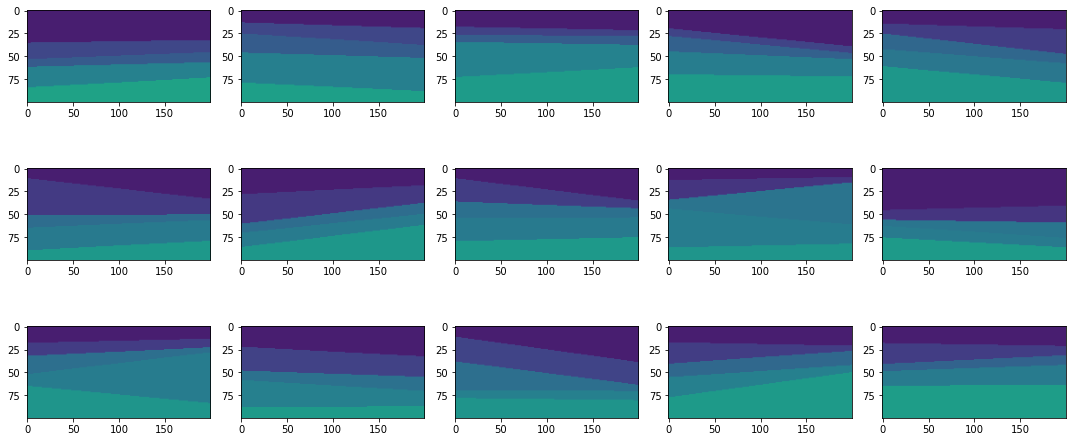

In [11]:
generator = dip_generator(shape,velseed)
test_generator(generator)

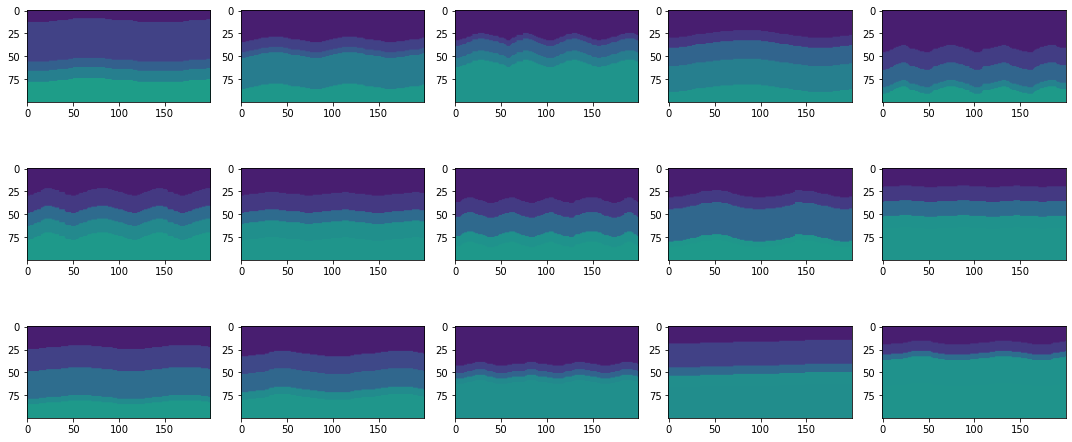

In [12]:
generator = cosine_fold_generator(shape,velseed)
test_generator(generator)

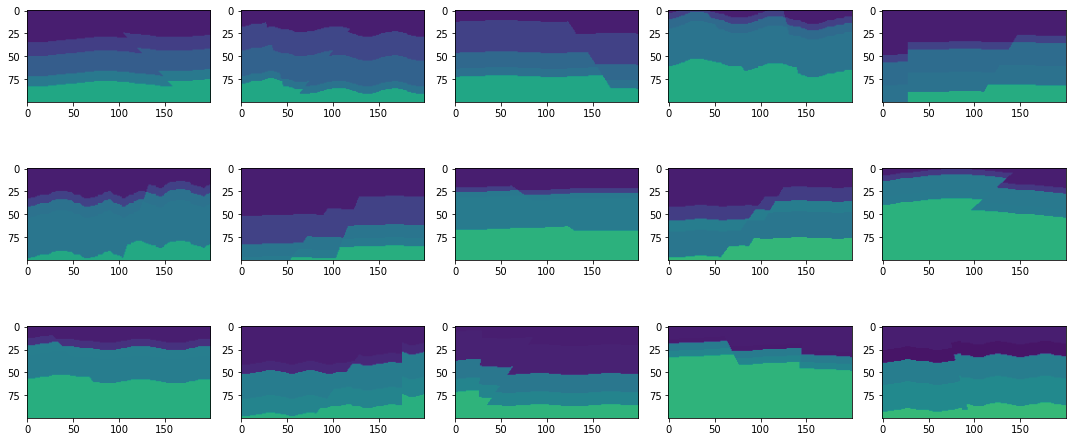

In [13]:
generator = linear_fault_generator(shape,velseed,max_nfaults=2)
test_generator(generator)

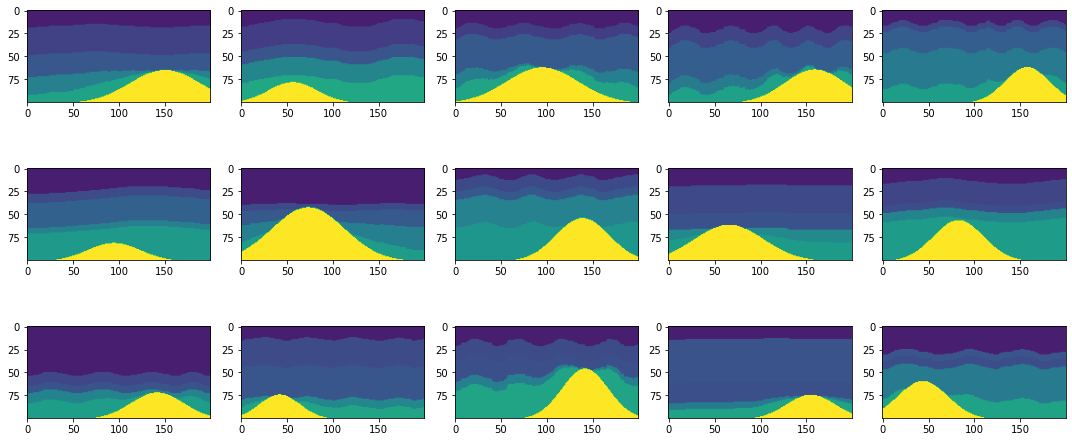

In [14]:
generator = gaussian_salt_generator(shape,velseed,vsalt=5.0)
test_generator(generator)

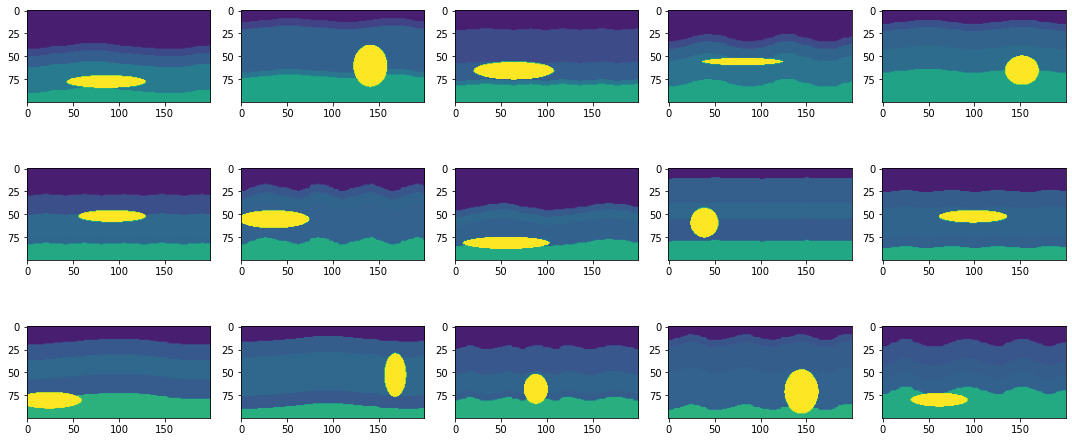

In [15]:
generator = elliptic_salt_generator(shape,velseed,vsalt=5.0,nsalts=1)
test_generator(generator)

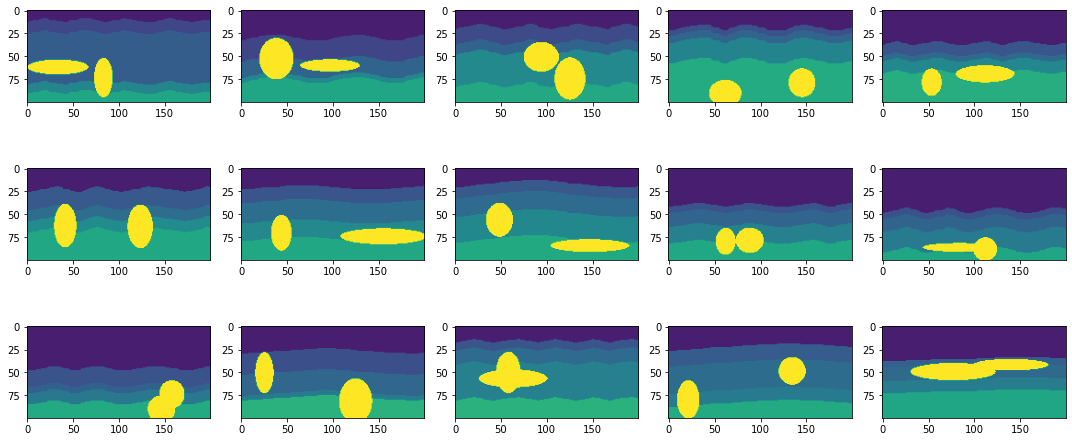

In [16]:
generator = elliptic_salt_generator(shape,velseed,vsalt=5.0,nsalts=2)
test_generator(generator)

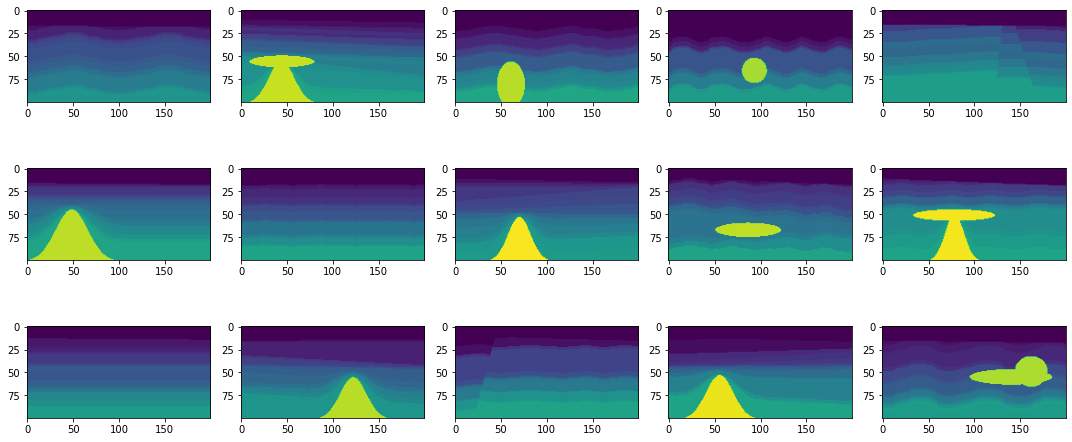

In [17]:
plt.figure(figsize=figsize)
for i in range(nvel):
    generator = gom_generator(shape, dz=0.05, vsalt=None)
    v=generator.generate()
    plt.subplot(nr,nc,i+1)
    plt.imshow(v.T,vmin=1.5,vmax=5)
plt.tight_layout()